## G-CARE Benchmark

In [72]:
using Graphs: DiGraph
using StatsPlots
include("Source/datasets.jl")
include("Source/QuasiStableCardinalityEstimator.jl")

get_cardinality_bounds (generic function with 1 method)

In [70]:
aids_data_file_path = "dataset/aids/aids.txt"
human_data_file_path = "dataset/human/human.txt"
lubm80_data_file_path = "dataset/lubm80/lubm80.txt"
yago_data_file_path = "dataset/yago/yago.txt"
yeast_data_file_path = "dataset/yeast/yeast.graph"
hprd_data_file_path = "dataset/hprd/hprd.graph"
wordnet_data_file_path = "dataset/wordnet/wordnet.graph"
dblp_data_file_path = "dataset/dblp/dblp.graph"

human_data = load_dataset(human_data_file_path)
aids_data = load_dataset(aids_data_file_path)
yeast_data = load_dataset(yeast_data_file_path, subgraph_matching_data=true)
hprd_data = load_dataset(hprd_data_file_path, subgraph_matching_data=true)
wordnet_data = load_dataset(wordnet_data_file_path, subgraph_matching_data=true)
dblp_data = load_dataset(dblp_data_file_path, subgraph_matching_data=true)
#lubm80_data = load_dataset(lubm80_data_file_path)
#yago_data = load_dataset(yago_data_file_path)
nothing

In [80]:
#datasets = [aids_data, human_data, lubm80_data, yago_data]
#dataset_names = ["aids", "human", "lubm80", "yago"]
datasets = Dict("aids"=>aids_data, "human"=>human_data, "yeast"=>yeast_data, "hprd" => hprd_data, "wordnet" => wordnet_data)
#dataset_names = ["aids", "human", "yeast"]
dataset_names = ["wordnet"]
num_sample_nodes = Dict("aids"=>100, "human"=>100, "yeast"=>50, "hprd"=>100, "wordnet"=>10)
gcare_dataset = Dict("aids"=>true, "human"=>true, "yeast"=>false, "hprd"=>false, "wordnet"=>false)
max_cycle_size = Dict("aids"=>6, "human"=>-1, "yeast"=>6, "hprd"=>-1, "wordnet"=>3)

Dict{String, Int64} with 5 entries:
  "yeast"   => 6
  "wordnet" => 3
  "hprd"    => -1
  "aids"    => 6
  "human"   => -1

In [39]:
build_time = Dict()
summary_size = Dict()
color_summaries = Dict()
hash_color_summaries = Dict()
no_color_summaries = Dict()
degree_color_summaries = Dict()
directed_degree_color_summaries = Dict()
num_colors = 16
for dataset in dataset_names
    directed_degree_color_summaries[dataset] = generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], max_partial_paths=num_sample_nodes[dataset], partitioner="DirectedDegree")
    degree_color_summaries[dataset] = generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], max_partial_paths=num_sample_nodes[dataset], partitioner="Degree")
    results = @timed generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], max_partial_paths=num_sample_nodes[dataset])
    build_time[dataset] = results[2]
    summary_size[dataset] = get_color_summary_size(results[1])
    color_summaries[dataset] = results[1]
    hash_color_summaries[dataset] = generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], max_partial_paths=num_sample_nodes[dataset], partitioner="Hash")
    no_color_summaries[dataset] = generate_color_summary(datasets[dataset], 1, verbose=true, max_size = max_cycle_size[dataset], max_partial_paths=num_sample_nodes[dataset])
    # println(no_color_summaries[dataset])
    # no_color_summaries[dataset] = generate_color_summary(datasets[dataset], 1, verbose=true, max_size = max_cycle_size[dataset], max_partial_paths=num_sample_nodes[dataset], partitioner="Simple Label")
    println(no_color_summaries[dataset])
end

Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics


Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Started coloring


Finished coloring
Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics


Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Started coloring


Finished coloring
Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Started coloring


Finished coloring
Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Label groups: [[0], [4], [2], [3], [1]]
Color hash was 76853
Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics


false
false


Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics


Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Started coloring


Finished coloring


Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics


Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Started coloring


Finished coloring
Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Label groups: [[0], [4], [2], [3], [1]]
Color hash was 76853


Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics


---------------------------------------------------------------------------------------------
Running wordnet
ColorSummary(Dict(1 => Dict(0 => 63098, 4 => 6632, -1 => 76853, 2 => 2560, 3 => 109, 1 => 4454)), Dict(0 => Dict(0 => Dict(1 => Dict(1 => 0.0)), 4 => Dict(1 => Dict(1 => 0.0)), -1 => Dict(1 => Dict(1 => 1.0)), 2 => Dict(1 => Dict(1 => 0.0)), 3 => Dict(1 => Dict(1 => 0.0)), 1 => Dict(1 => Dict(1 => 0.0))), -1 => Dict(0 => Dict(1 => Dict(1 => 0.0)), 4 => Dict(1 => Dict(1 => 0.0)), -1 => Dict(1 => Dict(1 => 1.0)), 2 => Dict(1 => Dict(1 => 0.0)), 3 => Dict(1 => Dict(1 => 0.0)), 1 => Dict(1 => Dict(1 => 0.0)))), Dict(0 => Dict(0 => Dict(1 => Dict(1 => 0.0)), 4 => Dict(1 => Dict(1 => 0.0)), -1 => Dict(1 => Dict(1 => 1.0)), 2 => Dict(1 => Dict(1 => 0.0)), 3 => Dict(1 => Dict(

1 => 0.0)), 1 => Dict(1 => Dict(1 => 0.0))), -1 => Dict(0 => Dict(1 => Dict(1 => 0.0)), 4 => Dict(1 => Dict(1 => 0.0)), -1 => Dict(1 => Dict(1 => 1.0)), 2 => Dict(1 => Dict(1 => 0.0)), 3 => Dict(1 => Dict(1 => 0.0)), 1 => Dict(1 => Dict(1 => 0.0)))), Dict(0 => Dict(0 => Dict(1 => Dict(1 => 2.7201280366413805)), 4 => Dict(1 => Dict(1 => 0.17997996174514982)), -1 => Dict(1 => Dict(1 => 3.133228371046023)), 2 => Dict(1 => Dict(1 => 0.056185184703264675)), 3 => Dict(1 => Dict(1 => 0.0034741649642824612)), 1 => Dict(1 => Dict(1 => 0.17346102299194566))), -1 => Dict(0 => Dict(1 => Dict(1 => 2.7201280366413805)), 4 => Dict(1 => Dict(1 => 0.17997996174514982)), -1 => Dict(1 => Dict(1 => 3.133228371046023)), 2 => Dict(1 => Dict(1 => 0.056185184703264675)), 3 => Dict(1 => Dict(1 => 0.0034741649642824612)), 1 => Dict(1 => Dict(1 => 0.17346102299194566)))), Dict(0 => Dict(0 => Dict(1 => Dict(1 => 2.7201280366413805)), 4 => Dict(1 => Dict(1 => 0.17997996174514982)), -1 => Dict(1 => Dict(1 => 3.1332

-1 => Dict(1 => Dict(1 => 3.133228371046023)), 2 => Dict(1 => Dict(1 => 0.056185184703264675)), 3 => Dict(1 => Dict(1 => 0.0034741649642824612)), 1 => Dict(1 => Dict(1 => 0.17346102299194566)))), Dict(0 => Dict(0 => Dict(1 => Dict(1 => 543.0)), 4 => Dict(1 => Dict(1 => 84.0)), -1 => Dict(1 => Dict(1 => 543.0)), 2 => Dict(1 => Dict(1 => 11.0)), 3 => Dict(1 => Dict(1 => 4.0)), 1 => Dict(1 => Dict(1 => 357.0))), -1 => Dict(0 => Dict(1 => Dict(1 => 543.0)), 4 => Dict(1 => Dict(1 => 84.0)), -1 => Dict(1 => Dict(1 => 543.0)), 2 => Dict(1 => Dict(1 => 11.0)), 3 => Dict(1 => Dict(1 => 4.0)), 1 => Dict(1 => Dict(1 => 357.0)))), Dict(0 => Dict(0 => Dict(1 => Dict(1 => 543.0)), 4 => Dict(1 => Dict(1 => 84.0)), -1 => Dict(1 => Dict(1 => 543.0)), 2 => Dict(1 => Dict(1 => 11.0)), 3 => Dict(1 => Dict(1 => 4.0)), 1 => Dict(1 => Dict(1 => 357.0))), -1 => Dict(0 => Dict(1 => Dict(1 => 543.0)), 4 => Dict(1 => Dict(1 => 84.0)), -1 => Dict(1 => Dict(1 => 543.0)), 2 => Dict(1 => Dict(1 => 11.0)), 3 => Dict(

0, 1], [-1, -1]) => 1.0, CyclePathAndColors(Bool[1], [-1, -1]) => 1.0, CyclePathAndColors(Bool[1, 0], [-1, -1]) => 1.0), 240798, 76853)


started graphing


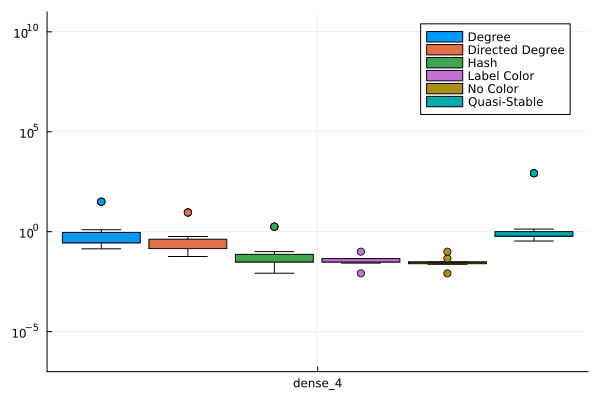

In [81]:
using Graphs: DiGraph
using StatsPlots
include("Source/datasets.jl")
include("Source/QuasiStableCardinalityEstimator.jl")

build_time = Dict()
summary_size = Dict()
color_summaries = Dict()
hash_color_summaries = Dict()
no_color_summaries = Dict()
degree_color_summaries = Dict()
directed_degree_color_summaries = Dict()
color_label_summaries = Dict()
num_colors = 16
for dataset in dataset_names
    directed_degree_color_summaries[dataset] = generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], max_partial_paths=num_sample_nodes[dataset], partitioner="DirectedDegree")
    degree_color_summaries[dataset] = generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], max_partial_paths=num_sample_nodes[dataset], partitioner="Degree")
    results = @timed generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], max_partial_paths=num_sample_nodes[dataset])
    build_time[dataset] = results[2]
    summary_size[dataset] = get_color_summary_size(results[1])
    color_summaries[dataset] = results[1]
    hash_color_summaries[dataset] = generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], max_partial_paths=num_sample_nodes[dataset], partitioner="Hash")
    no_color_summaries[dataset] = generate_color_summary(datasets[dataset], 1, verbose=true, max_size = max_cycle_size[dataset], max_partial_paths=num_sample_nodes[dataset])
    # println(no_color_summaries[dataset])
    color_label_summaries[dataset] = generate_color_summary(datasets[dataset], 1, verbose=true, max_size = max_cycle_size[dataset], max_partial_paths=num_sample_nodes[dataset], partitioner="Simple Label")
    # println(no_color_summaries[dataset])
end

query_directories = Dict()
query_directories["human"] = ["/queryset/human/Chain_3/",
                                "/queryset/human/Graph_3/",
                                "/queryset/human/Star_3/",
                                "/queryset/human/Tree_3/"]
query_directories["aids"] = ["/queryset/aids/Chain_3/",
                                "/queryset/aids/Chain_6/",
                                "/queryset/aids/Chain_9/",
                                "/queryset/aids/Chain_12/",
                                "/queryset/aids/Cycle_3/",
                                "/queryset/aids/Cycle_6/",
                                "/queryset/aids/Flower_6/",
                                "/queryset/aids/Flower_9/",
                                "/queryset/aids/Flower_12/",
                                "/queryset/aids/Graph_3/",
                                "/queryset/aids/Graph_6/",
                                "/queryset/aids/Graph_9/",
                                "/queryset/aids/Graph_12/",
                                "/queryset/aids/Petal_6/",
                                "/queryset/aids/Petal_9/",
                                "/queryset/aids/Petal_12/",
                                "/queryset/aids/Star_3/",
                                "/queryset/aids/Star_6/",
                                "/queryset/aids/Star_9/",
                                "/queryset/aids/Tree_3/",
                                "/queryset/aids/Tree_6/",
                                "/queryset/aids/Tree_9/",
                                "/queryset/aids/Tree_12/"]

query_directories["yeast"] = ["/queryset/yeast"]
query_directories["hprd"] = ["/queryset/hprd"]
query_directories["wordnet"] = ["/queryset/wordnet"]
dataset_names = ["wordnet"]
                                

query_paths = Dict()
for dataset in dataset_names
    query_paths[dataset] = [readdir(pwd() * dir, join=true) for dir in query_directories[dataset]]
    query_paths[dataset] = [(query_paths[dataset]...)...]
end
exact_sizes = Dict(dataset => [] for dataset in dataset_names)
bounds = Dict(dataset => [] for dataset in dataset_names)
bounds_with_stats = Dict(dataset => [] for dataset in dataset_names)
bounds_with_hash = Dict(dataset => [] for dataset in dataset_names)
bounds_with_no_color = Dict(dataset => [] for dataset in dataset_names)
bounds_with_degree = Dict(dataset => [] for dataset in dataset_names)
bounds_with_directed_degree = Dict(dataset => [] for dataset in dataset_names)
bounds_with_label_color = Dict(dataset => [] for dataset in dataset_names)
query_types = Dict(dataset => [] for dataset in dataset_names)
count = 0
for dataset in dataset_names
    println("---------------------------------------------------------------------------------------------")
    println("Running ", dataset)
    println(no_color_summaries[dataset])

    for query_path in query_paths[dataset]
        occursin("dense_32", query_path) && continue
        occursin("dense_24", query_path) && continue
        occursin("dense_20", query_path) && continue
        occursin("dense_16", query_path) && continue
        occursin("dense_12", query_path) && continue
        occursin("dense_8", query_path) && continue
        occursin("sparse_32", query_path) && continue
        occursin("sparse_24", query_path) && continue
        count += 1
        count % 10 != 0 && continue
        # println("Query: ", query_path)
        if gcare_dataset[dataset]
            query_type = match(r".*/queryset/.*\\(.*)_.*\.*", query_path).captures[1]
            exact_size = load_true_cardinality(replace(query_path, "queryset"=>"TrueCardinalities"))
            id_and_query = load_query(query_path)
            id = id_and_query[1]
            query = id_and_query[2]
        else
            thing = match(r".*/queryset/.*\\query_(.*)_.*", query_path)
            if (thing === nothing)
                println("missed")
                continue
            end
            query_type = match(r".*/queryset/.*\\query_(.*)_.*", query_path).captures[1]
            if isfile(replace(query_path, "queryset"=>"TrueCardinalities"))
                exact_size = load_true_cardinality(replace(query_path, "queryset"=>"TrueCardinalities"))
            else
                continue
            end
            id_and_query = load_query(query_path, subgraph_matching_data=true)
            id = id_and_query[1]
            query = id_and_query[2]
        end
        bound_results = @timed get_cardinality_bounds(query, color_summaries[dataset], usingStoredStats=false)
        bound_results_with_stats = get_cardinality_bounds(query, color_summaries[dataset], usingStoredStats=true)
        bound_results_with_hash = get_cardinality_bounds(query, hash_color_summaries[dataset], usingStoredStats=true)
        bound_results_with_no_color = get_cardinality_bounds(query, no_color_summaries[dataset], usingStoredStats=true)
        bound_results_with_label_color = get_cardinality_bounds(query, color_label_summaries[dataset], usingStoredStats=true)

        # println(bound_results_with_no_color)
        bound_results_with_degree = get_cardinality_bounds(query, degree_color_summaries[dataset], usingStoredStats=true)
        bound_results_with_directed_degree = get_cardinality_bounds(query, directed_degree_color_summaries[dataset], usingStoredStats=true)
        bound_results[1][2] = max(1, bound_results[1][2])
        bound_results_with_stats[2] = max(1, bound_results_with_stats[2])
        bound_results_with_hash[2] = max(1, bound_results_with_hash[2])
        bound_results_with_no_color[2] = max(1, bound_results_with_no_color[2])
        bound_results_with_label_color[2] = max(1, bound_results_with_label_color[2])
        bound_results_with_degree[2] = max(1, bound_results_with_degree[2])
        bound_results_with_directed_degree[2] = max(1, bound_results_with_directed_degree[2])
        push!(exact_sizes[dataset], exact_size)
        push!(bounds[dataset], bound_results[1])
        push!(bounds_with_stats[dataset], bound_results_with_stats)
        push!(bounds_with_hash[dataset], bound_results_with_hash)
        push!(bounds_with_no_color[dataset], bound_results_with_no_color)
        push!(bounds_with_label_color[dataset], bound_results_with_label_color)
        push!(bounds_with_degree[dataset], bound_results_with_degree)
        push!(bounds_with_directed_degree[dataset], bound_results_with_directed_degree)
        push!(query_types[dataset], query_type)
    end
end
relative_errors = Dict(dataset => bounds[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_stats = Dict(dataset => bounds_with_stats[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_hash = Dict(dataset => bounds_with_hash[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_no_color = Dict(dataset => bounds_with_no_color[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_label_color = Dict(dataset => bounds_with_label_color[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_degree = Dict(dataset => bounds_with_degree[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_directed_degree = Dict(dataset => bounds_with_directed_degree[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)




grouped_errors = vec([[x[2] for x in relative_errors_with_stats["wordnet"]]... [x[2] for x in relative_errors_with_hash["wordnet"]]...  [x[2] for x in relative_errors_with_no_color["wordnet"]]...  [x[2] for x in relative_errors_with_degree["wordnet"]]... [x[2] for x in relative_errors_with_directed_degree["wordnet"]]... [x[2] for x in relative_errors_with_label_color["wordnet"]]...])
grouped_query_types = vec([query_types["wordnet"]... query_types["wordnet"]... query_types["wordnet"]... query_types["wordnet"]... query_types["wordnet"]... query_types["wordnet"]...])
grouped_datasets = vec([["Quasi-Stable" for _ in 1:length(query_types["wordnet"])]... ["Hash" for _ in 1:length(query_types["wordnet"])]... ["No Color" for _ in 1:length(query_types["wordnet"])]... ["Degree" for _ in 1:length(query_types["wordnet"])]... ["Directed Degree" for _ in 1:length(query_types["wordnet"])]... ["Label Color" for _ in 1:length(query_types["wordnet"])]...])
println("started graphing")
groupedboxplot(grouped_query_types, grouped_errors, group = grouped_datasets, yscale =:log10,  ylims=[10^-7, 10^11], yticks=[10^-5, 1, 10^5, 10^10])

In [49]:

relative_errors = Dict(dataset => bounds[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_stats = Dict(dataset => bounds_with_stats[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_hash = Dict(dataset => bounds_with_hash[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_no_color = Dict(dataset => bounds_with_no_color[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_degree = Dict(dataset => bounds_with_degree[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_directed_degree = Dict(dataset => bounds_with_directed_degree[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)



Dict{String, Vector{Vector{Float64}}} with 1 entry:
  "wordnet" => [[0.0, 0.144002, 8718.27], [0.0, 0.0571729, 9.02499e5], [0.0, 0.…

In [42]:
using WAV
y, fs = wavread(raw"C:\Windows\Media\Alarm01.wav")
wavplay(y, fs)

In [7]:
sum([x[2] != 1 for x in values(bounds)])

1

In [8]:
sum([x[2] != 1 for x in values(bounds)])

1

In [9]:
exact_sizes["yeast"][exact_sizes["yeast"] .> 0]

KeyError: KeyError: key "yeast" not found

In [8]:
grouped_errors = vec([[x[2] for x in relative_errors_with_stats["human"]]... [x[2] for x in relative_errors_with_hash["human"]]...  [x[2] for x in relative_errors_with_no_color["human"]]...  [x[2] for x in relative_errors_with_degree["human"]]... [x[2] for x in relative_errors_with_directed_degree["human"]]... ])
grouped_query_types = vec([query_types["human"]... query_types["human"]... query_types["human"]... query_types["human"]... query_types["human"]...])
grouped_datasets = vec([["Quasi-Stable" for _ in 1:length(query_types["human"])]... ["Hash" for _ in 1:length(query_types["human"])]... ["No Partition" for _ in 1:length(query_types["human"])]... ["Degree" for _ in 1:length(query_types["human"])]... ["Directed Degree" for _ in 1:length(query_types["human"])]...])
groupedboxplot(grouped_query_types, grouped_errors, group = grouped_datasets, yscale =:log10, ylims=[10^-4, 10^7], yticks=[10^-4, 10^-2, 1, 10^2, 10^4, 10^6])

KeyError: KeyError: key "human" not found

In [11]:
grouped_errors = vec([[x[2] for x in relative_errors_with_stats["aids"]]... [x[2] for x in relative_errors_with_hash["aids"]]...  [x[2] for x in relative_errors_with_no_color["aids"]]...  [x[2] for x in relative_errors_with_degree["aids"]]... [x[2] for x in relative_errors_with_directed_degree["aids"]]... ])
grouped_query_types = vec([query_types["aids"]... query_types["aids"]... query_types["aids"]... query_types["aids"]... query_types["aids"]...])
grouped_datasets = vec([["Quasi-Stable" for _ in 1:length(query_types["aids"])]... ["Hash" for _ in 1:length(query_types["aids"])]... ["No Partition" for _ in 1:length(query_types["aids"])]... ["Degree" for _ in 1:length(query_types["aids"])]... ["Directed Degree" for _ in 1:length(query_types["aids"])]...])
groupedboxplot(grouped_query_types, grouped_errors, group = grouped_datasets, yscale =:log10,  ylims=[10^-6, 10^11], yticks=[10^-5, 1, 10^5, 10^10])

KeyError: KeyError: key "aids" not found

In [12]:
grouped_errors = vec([[x[2] for x in relative_errors_with_stats["yeast"]]... [x[2] for x in relative_errors_with_hash["yeast"]]...  [x[2] for x in relative_errors_with_no_color["yeast"]]...  [x[2] for x in relative_errors_with_degree["yeast"]]... [x[2] for x in relative_errors_with_directed_degree["yeast"]]... ])
grouped_query_types = vec([query_types["yeast"]... query_types["yeast"]... query_types["yeast"]... query_types["yeast"]... query_types["yeast"]...])
grouped_datasets = vec([["Quasi-Stable" for _ in 1:length(query_types["yeast"])]... ["Hash" for _ in 1:length(query_types["yeast"])]... ["No Partition" for _ in 1:length(query_types["yeast"])]... ["Degree" for _ in 1:length(query_types["yeast"])]... ["Directed Degree" for _ in 1:length(query_types["yeast"])]...])
groupedboxplot(grouped_query_types, grouped_errors, group = grouped_datasets, yscale =:log10,  ylims=[10^-6, 10^11], yticks=[10^-5, 1, 10^5, 10^10])

KeyError: KeyError: key "yeast" not found

In [13]:
grouped_errors = vec([[x[2] for x in relative_errors_with_stats["hprd"]]... [x[2] for x in relative_errors_with_hash["hprd"]]...  [x[2] for x in relative_errors_with_no_color["hprd"]]...  [x[2] for x in relative_errors_with_degree["hprd"]]... [x[2] for x in relative_errors_with_directed_degree["hprd"]]... ])
grouped_query_types = vec([query_types["hprd"]... query_types["hprd"]... query_types["hprd"]... query_types["hprd"]... query_types["hprd"]...])
grouped_datasets = vec([["Quasi-Stable" for _ in 1:length(query_types["hprd"])]... ["Hash" for _ in 1:length(query_types["hprd"])]... ["No Partition" for _ in 1:length(query_types["hprd"])]... ["Degree" for _ in 1:length(query_types["hprd"])]... ["Directed Degree" for _ in 1:length(query_types["hprd"])]...])
groupedboxplot(grouped_query_types, grouped_errors, group = grouped_datasets, yscale =:log10,  ylims=[10^-6, 10^11], yticks=[10^-5, 1, 10^5, 10^10])

KeyError: KeyError: key "hprd" not found

In [50]:
grouped_errors = vec([[x[2] for x in relative_errors_with_stats["wordnet"]]... [x[2] for x in relative_errors_with_hash["wordnet"]]...  [x[2] for x in relative_errors_with_no_color["wordnet"]]...  [x[2] for x in relative_errors_with_degree["wordnet"]]... [x[2] for x in relative_errors_with_directed_degree["wordnet"]]... ])
grouped_query_types = vec([query_types["wordnet"]... query_types["wordnet"]... query_types["wordnet"]... query_types["wordnet"]... query_types["wordnet"]...])
grouped_datasets = vec([["Quasi-Stable" for _ in 1:length(query_types["wordnet"])]... ["Hash" for _ in 1:length(query_types["wordnet"])]... ["Color Label" for _ in 1:length(query_types["wordnet"])]... ["Degree" for _ in 1:length(query_types["wordnet"])]... ["Directed Degree" for _ in 1:length(query_types["wordnet"])]...])
groupedboxplot(grouped_query_types, grouped_errors, group = grouped_datasets, yscale =:log10,  ylims=[10^-7, 10^11], yticks=[10^-5, 1, 10^5, 10^10])

ArgumentError: ArgumentError: quantiles are undefined in presence of NaNs or missing values

In [68]:
query_directories = Dict()
query_directories["yeast"] = ["/queryset/yeast"]
query_directories["hprd"] = ["/queryset/hprd"]
query_directories["wordnet"] = ["/queryset/wordnet"]
dataset_names = ["yeast"]

query_paths = Dict()
for dataset in dataset_names
    query_paths[dataset] = [readdir(pwd() * dir, join=true) for dir in query_directories[dataset]]
    query_paths[dataset] = [(query_paths[dataset]...)...]
end
count = 0
timeout = 120
query = 0
for dataset in dataset_names
    println("---------------------------------------------------------------------------------------------")
    println("Running ", dataset)
    for query_path in query_paths[dataset]
        count += 1
        true_card_path = replace(query_path, "queryset"=>"TrueCardinalities")
        id_and_query = load_query(query_path, subgraph_matching_data=true)
        if isfile(true_card_path)  || !occursin("sparse_8_", query_path) 
            continue
        end
        println("Query: ", query_path)
        id = id_and_query[1]
        query = id_and_query[2]
        exact_size = get_exact_size(query, datasets[dataset], timeout=timeout)
        if exact_size < 0
            println("Timed Out!")
            continue
        elseif exact_size == 0
            println("Zero Matches!")
            continue
        end
        true_card_file = open(true_card_path, "w")
        show(true_card_file , exact_size)
        close(true_card_file)
    end
end

In [ ]:
using Statistics
println(maximum([log10(x[2]) for x in human_relative_errors]))
println(mean([abs(log10(x[2])) for x in human_relative_errors]))
println(minimum([log10(x[2]) for x in human_relative_errors]))

In [ ]:
using Statistics
println(maximum([log10(x[2]) for x in human_relative_errors_with_stats]))
println(mean([abs(log10(x[2])) for x in human_relative_errors_with_stats]))
println(minimum([log10(x[2]) for x in human_relative_errors_with_stats]))

In [ ]:
StatsPlots.boxplot(human_query_type, [x[2] for x in human_relative_errors_with_stats],  yscale=:log10, fillalpha=0.5, linewidth=2, label="With Coloring", ylims=[10^-4, 10^7], yticks=[10^-4,10^-2, 1, 10^2, 10^4, 10^6])
StatsPlots.boxplot!(human_query_type, [x[2] for x in human_relative_errors_with_hash],  yscale=:log10, fillalpha=0.5, linewidth=2, label="With Hash")
StatsPlots.boxplot!(human_query_type, [x[2] for x in human_relative_errors_with_no_color],  yscale=:log10, fillalpha=0.5, linewidth=2, label="1 Color")

In [ ]:
include("Source/QuasiStableCardinalityEstimator.jl")

aids_query_directories = ["/queryset/aids/Chain_3/",
"/queryset/aids/Chain_6/",
"/queryset/aids/Chain_9/",
"/queryset/aids/Chain_12/",
"/queryset/aids/Cycle_3/",
"/queryset/aids/Cycle_6/",
"/queryset/aids/Flower_6/",
"/queryset/aids/Flower_9/",
"/queryset/aids/Flower_12/",
"/queryset/aids/Graph_3/",
"/queryset/aids/Graph_6/",
"/queryset/aids/Graph_9/",
"/queryset/aids/Graph_12/",
"/queryset/aids/Petal_6/",
"/queryset/aids/Petal_9/",
"/queryset/aids/Petal_12/",
"/queryset/aids/Star_3/",
"/queryset/aids/Star_6/",
"/queryset/aids/Star_9/",
"/queryset/aids/Tree_3/",
"/queryset/aids/Tree_6/",
"/queryset/aids/Tree_9/",
"/queryset/aids/Tree_12/"]
aids_query_paths = [readdir(pwd() * dir, join=true) for dir in aids_query_directories]
aids_query_paths = [(aids_query_paths...)...]
aids_exact_sizes = []
aids_bounds = []
aids_bounds_with_stats = []
aids_relative_errors = []
aids_relative_errors_with_stats = []
aids_query_types = []
println("Summary Size: ", summary_size["aids"])
println("Summary Build Time: ", build_time["aids"])
for query_path in aids_query_paths
    println("Query: ", query_path)
    id_and_query = load_query(query_path)
    id = id_and_query[1]
    query = id_and_query[2]
    query_type = match(r".*/queryset/aids/(.*)_.*/.*", query_path).captures[1]
    if query_type != "Cycle"
        continue
    end
    bound_results = @timed get_cardinality_bounds(query, color_summaries["aids"], usingStoredStats=false)
    bound_results_with_stats = @timed get_cardinality_bounds(query, color_summaries["aids"], usingStoredStats=true)
    gcare_size = load_true_cardinality(replace(query_path, "queryset"=>"TrueCardinalities"))
#    println("Bound Time: ", bound_results[2])
#    println("Exact Size: ", gcare_size)
#    println("Bound [Lower, Avg, Upper]: ", bound_results[1])
#    println("Relative Error [Lower, Avg, Upper]: ", bound_results[1]./gcare_size)
    bound_results[1][2] = max(1, bound_results[1][2])
    bound_results_with_stats[1][2] = max(1, bound_results_with_stats[1][2])
    push!(aids_exact_sizes, gcare_size)
    push!(aids_bounds, bound_results[1])
    push!(aids_bounds_with_stats, bound_results_with_stats[1])
    push!(aids_relative_errors, bound_results[1] ./ gcare_size)
    push!(aids_relative_errors_with_stats, bound_results_with_stats[1] ./ gcare_size)
    push!(aids_query_types, query_type)
end

In [ ]:
using Statistics
println(maximum([log10(x[2]) for x in aids_relative_errors]))
println(mean([log10(x[2]) for x in aids_relative_errors]))
println(mean([abs(log10(x[2])) for x in aids_relative_errors]))
println(minimum([log10(x[2]) for x in aids_relative_errors]))

In [ ]:
using Statistics
println(maximum([log10(x[2]) for x in aids_relative_errors_with_stats]))
println(mean([log10(x[2]) for x in aids_relative_errors_with_stats]))
println(mean([abs(log10(x[2])) for x in aids_relative_errors_with_stats]))
println(minimum([log10(x[2]) for x in aids_relative_errors_with_stats]))

In [ ]:
StatsPlots.boxplot(aids_query_types, [x[2] for x in aids_relative_errors_with_stats],  yscale=:log10, fillalpha=0.5, linewidth=2, label="With Cycle Stats", ylims=[10^-6, 10^11], yticks=[10^-5, 1, 10^5, 10^10])
StatsPlots.boxplot!(aids_query_types, [x[2] for x in aids_relative_errors],  yscale=:log10, fillalpha=0.5, linewidth=2, label="Without Cycle Stats")

In [ ]:
print(data[!,"QueryType"])

In [ ]:
lubm80_query_paths = ["lubm80/lubm80_Q2.txt",
# "lubm80/lubm80_Q4.txt",
# "lubm80/lubm80_Q7.txt",
# "lubm80/lubm80_Q8.txt",
# "lubm80/lubm80_Q9.txt",
# "lubm80/lubm80_Q12.txt"
                    ]
exactSizes = []
bounds = []
relativeErrors = []
println("Summary Size: ", summary_size[1])
println("Summary Build Time: ", build_time[1])
for query_path in lubm80_query_paths
    println("Query: ", query_path)
    id_and_query = load_query("queryset/" * query_path)
    id = id_and_query[1]
    query = id_and_query[2]
    bound_results = @timed get_cardinality_bounds(query, color_summaries[1])
    exact_size_results = @timed get_exact_size(query, datasets[1])
    gcare_size = load_true_cardinality("TrueCardinalities/" * query_path)
    println("Bound Time: ", bound_results[2])
    println("Exact Size Time: ", exact_size_results[2])
    println("Exact Size: ", exact_size_results[1])
    println("GCare Exact Size: ", gcare_size)
    if gcare_size != exact_size_results[1]
        println("Bad Exact Size Estimate!!")
        break
    end
    println("Bound [Lower, Avg, Upper]: ", bound_results[1])
    println("Relative Error [Lower, Avg, Upper]: ", (bound_results[1])./exact_size_results[1])
    push!(exactSizes, gcare_size)
    push!(bounds, bound_results[1])
    push!(relativeErrors, bound_results[1] ./ gcare_size)
end

In [ ]:
exactSizes